<a href="https://colab.research.google.com/github/wahyuusuryaa/ta-dataset-ukiran-bali/blob/main/cnn_mobilenetv2_train_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/wahyuusuryaa/ta-dataset-ukiran-bali.git

Cloning into 'ta-dataset-ukiran-bali'...
remote: Enumerating objects: 275, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 275 (delta 8), reused 60 (delta 1), pack-reused 192
Receiving objects: 100% (275/275), 528.52 MiB | 35.27 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (215/215), done.


In [2]:
import tensorflow as tf
import keras

print("Versi TensorFlow:", tf.__version__)
print("Versi Keras:", keras.__version__)

Versi TensorFlow: 2.15.0
Versi Keras: 2.15.0


In [3]:
!pip install Augmentor

In [4]:
# AUGMENTASI DATA #
import os
import Augmentor

def apply_data_augmentation(input_folder, output_folder, num_augmented_images_per_category):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    categories = ['kekarangan_boma', 'kekarangan_bunga', 'kekarangan_gajah', 'kekarangan_goak', 'kekarangan_tapel', 'keketusan_batu_batuan', 'keketusan_kakul_kakulan', 'keketusan_mas_masan', 'keketusan_mote_motean', 'patra_banci', 'patra_mesir', 'patra_pipid', 'patra_sari']

    for category in categories:
        output_category_folder = os.path.join(output_folder, category)
        if not os.path.exists(output_category_folder):
            os.makedirs(output_category_folder)

        input_category_folder = os.path.join(input_folder, category)
        if os.path.exists(input_category_folder):
            p = Augmentor.Pipeline(source_directory=input_category_folder, output_directory=output_category_folder)
            p.rotate(probability=0.5, max_left_rotation=10, max_right_rotation=10)
            p.flip_left_right(probability=0.5)
            p.flip_top_bottom(probability=0.5)
            p.random_distortion(probability=0.5, grid_width=4, grid_height=4, magnitude=8)
            p.resize(probability=1.0, width=512, height=512)
            p.sample(num_augmented_images_per_category)
        else:
            print(f"Direktori sumber {input_category_folder} tidak ditemukan. Melanjutkan ke kategori berikutnya.")
            continue

input_folder = '/content/ta-dataset-ukiran-bali'
output_folder = '/content/ta-dataset-ukiran-bali/augmented'
num_augmented_images_per_category = 100

apply_data_augmentation(input_folder, output_folder, num_augmented_images_per_category)

Initialised with 30 image(s) found.
Output directory set to /content/ta-dataset-ukiran-bali/augmented/kekarangan_boma.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7C214D80E740>: 100%|██████████| 100/100 [01:41<00:00,  1.02s/ Samples]


Initialised with 7 image(s) found.
Output directory set to /content/ta-dataset-ukiran-bali/augmented/kekarangan_bunga.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7C214D82EB60>: 100%|██████████| 100/100 [00:50<00:00,  1.97 Samples/s]


Initialised with 21 image(s) found.
Output directory set to /content/ta-dataset-ukiran-bali/augmented/kekarangan_gajah.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7C214D842C50>: 100%|██████████| 100/100 [01:02<00:00,  1.60 Samples/s]


Initialised with 30 image(s) found.
Output directory set to /content/ta-dataset-ukiran-bali/augmented/kekarangan_goak.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7C214D841990>: 100%|██████████| 100/100 [01:04<00:00,  1.54 Samples/s]


Initialised with 16 image(s) found.
Output directory set to /content/ta-dataset-ukiran-bali/augmented/kekarangan_tapel.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7C214D80DE40>: 100%|██████████| 100/100 [00:58<00:00,  1.71 Samples/s]


Initialised with 15 image(s) found.
Output directory set to /content/ta-dataset-ukiran-bali/augmented/keketusan_batu_batuan.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7C214D85A980>: 100%|██████████| 100/100 [01:36<00:00,  1.03 Samples/s]


Initialised with 21 image(s) found.
Output directory set to /content/ta-dataset-ukiran-bali/augmented/keketusan_kakul_kakulan.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7C214D883040>: 100%|██████████| 100/100 [01:32<00:00,  1.08 Samples/s]


Initialised with 12 image(s) found.
Output directory set to /content/ta-dataset-ukiran-bali/augmented/keketusan_mas_masan.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7C214D947E50>: 100%|██████████| 100/100 [02:09<00:00,  1.29s/ Samples]


Initialised with 14 image(s) found.
Output directory set to /content/ta-dataset-ukiran-bali/augmented/keketusan_mote_motean.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7C214D9452D0>: 100%|██████████| 100/100 [01:18<00:00,  1.27 Samples/s]


Initialised with 10 image(s) found.
Output directory set to /content/ta-dataset-ukiran-bali/augmented/patra_banci.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7C214D88F700>: 100%|██████████| 100/100 [00:53<00:00,  1.88 Samples/s]


Initialised with 9 image(s) found.
Output directory set to /content/ta-dataset-ukiran-bali/augmented/patra_mesir.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7C214D88DB10>: 100%|██████████| 100/100 [00:48<00:00,  2.08 Samples/s]


Initialised with 8 image(s) found.
Output directory set to /content/ta-dataset-ukiran-bali/augmented/patra_pipid.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7C214D80E1D0>: 100%|██████████| 100/100 [01:21<00:00,  1.22 Samples/s]


Initialised with 20 image(s) found.
Output directory set to /content/ta-dataset-ukiran-bali/augmented/patra_sari.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7C214D82D150>: 100%|██████████| 100/100 [01:20<00:00,  1.25 Samples/s]


In [5]:
# HITUNG JUMLAH FILE YANG ADA DI FOLDER, GUNA MEMASTIKAN JUMLAH DATASET YANG AKAN DIPAKAI #
import os

def count_files_in_subfolders(directory):
    total_files = 0
    for root, dirs, files in os.walk(directory):
        total_files += len(files)
    return total_files

augmented_folder_path = '/content/ta-dataset-ukiran-bali/augmented'
total_files = count_files_in_subfolders(augmented_folder_path)
print(f"Total file dalam sub-sub folder di {augmented_folder_path}: {total_files}")

Total file dalam sub-sub folder di /content/ta-dataset-ukiran-bali/augmented: 1300


In [6]:
import zipfile
import os

def create_zip(folder_path, zip_path):
    # Membuka file zip
    with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        # Iterasi melalui semua file dan direktori di dalam folder
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                # Menambahkan file ke dalam zip
                zipf.write(file_path, os.path.relpath(file_path, folder_path))

# Mengatur path folder yang ingin di-zip
folder_path = '/content/ta-dataset-ukiran-bali/augmented'

# Mengatur path tempat menyimpan file zip
zip_path = '/content/ta-dataset-ukiran-bali/augmented.zip'

# Memanggil fungsi untuk membuat file zip
create_zip(folder_path, zip_path)

In [7]:
# CONVERT IMAGE BGR2RGB TO ARRAY #
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

img_size_224p = 224

path_train = '/content/ta-dataset-ukiran-bali/augmented'
categories = ['kekarangan_boma', 'kekarangan_bunga', 'kekarangan_gajah', 'kekarangan_goak', 'kekarangan_tapel', 'keketusan_batu_batuan', 'keketusan_kakul_kakulan', 'keketusan_mas_masan', 'keketusan_mote_motean', 'patra_banci', 'patra_mesir', 'patra_pipid', 'patra_sari']

def create_data_img(folder_path):
    imageData = []
    for category in categories:
        path = os.path.join(folder_path, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array   = cv2.imread(os.path.join(path, img))
            img_convert = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            img_resize  = cv2.resize(img_convert, (img_size_224p, img_size_224p))
            imageData.append([img_resize, class_num])
            print(f"Nama file: {img}")
            print(f"Kelas: {category}")
            print(f"Array citra: {img_resize}")
            print(f"Label: {class_num}")
            print("")

    return imageData

dataTrain = create_data_img(path_train)

random.seed(10)
random.shuffle(dataTrain)

Streaming output truncated to the last 5000 lines.

 [[171 185 198]
  [173 187 200]
  [176 190 203]
  ...
  [133 138 134]
  [133 138 134]
  [133 138 134]]

 [[172 186 198]
  [173 187 200]
  [177 191 204]
  ...
  [133 138 134]
  [133 138 134]
  [133 138 134]]]
Label: 12

Nama file: patra_sari_original_Patra_sari_009.jpg_fb669d77-04fb-42af-9324-e3dea725db95.jpg
Kelas: patra_sari
Array citra: [[[ 94  83  92]
  [ 97  87  95]
  [ 92  84  92]
  ...
  [ 97  95  98]
  [102 102 104]
  [ 99 100 104]]

 [[ 91  86  92]
  [ 88  83  89]
  [ 87  84  89]
  ...
  [102 100 103]
  [ 96  96  98]
  [ 98  99 103]]

 [[ 84  85  89]
  [ 82  81  86]
  [ 82  82  86]
  ...
  [104 102 105]
  [103 103 105]
  [ 98 100 103]]

 ...

 [[133 113 123]
  [134 114 124]
  [135 115 125]
  ...
  [122 135 144]
  [115 128 137]
  [117 130 139]]

 [[136 121 128]
  [137 122 129]
  [138 123 130]
  ...
  [127 140 149]
  [118 131 140]
  [117 130 139]]

 [[139 126 135]
  [139 126 135]
  [140 127 136]
  ...
  [126 139 148]
  [119 132 

In [8]:
# GET Features(X) & GET Labels(Y)
# X untuk Features & y untuk labels
X_train, y_train = [], []

for features, label in dataTrain:
    X_train.append(features)
    y_train.append(label)

# -1 di reshape artinya membiarkan numpy menentukan dimensi data yang sesuai
X_train = np.array(X_train).reshape(-1, img_size_224p, img_size_224p, 3) #### 1 UNTUK GRAYSCALE, 3 UNTUK RGB ####
y_train = np.asarray(y_train)

print("X_train :", X_train.shape)
print("y_train :", y_train.shape)

X_train : (1300, 224, 224, 3)
y_train : (1300,)


In [9]:
# Features(X) Normalization
print("Isi Array X_train :\n\n", X_train[0])

def prep_pixels(dataset):
    train_norm = dataset.astype('float32')
    train_norm = train_norm / 255.0
    return train_norm

X_train_norm = prep_pixels(X_train)

print("\nIsi Array X_train_norm :\n\n", X_train_norm[0])

Isi Array X_train :

 [[[254 252 255]
  [254 254 252]
  [254 255 245]
  ...
  [150 136 101]
  [153 135 109]
  [123 101  78]]

 [[254 253 255]
  [254 254 252]
  [254 255 249]
  ...
  [178 162 138]
  [108  89  72]
  [ 62  43  26]]

 [[254 253 255]
  [254 254 252]
  [254 255 250]
  ...
  [159 142 126]
  [ 79  62  47]
  [ 43  26  11]]

 ...

 [[104 108 103]
  [103 107 101]
  [113 117 113]
  ...
  [225 225 222]
  [202 203 202]
  [104 106 105]]

 [[113 118 114]
  [131 136 132]
  [126 131 128]
  ...
  [198 198 198]
  [229 229 231]
  [204 204 206]]

 [[112 118 114]
  [127 133 129]
  [124 130 128]
  ...
  [146 144 147]
  [155 153 158]
  [212 211 216]]]

Isi Array X_train_norm :

 [[[0.99607843 0.9882353  1.        ]
  [0.99607843 0.99607843 0.9882353 ]
  [0.99607843 1.         0.9607843 ]
  ...
  [0.5882353  0.53333336 0.39607844]
  [0.6        0.5294118  0.42745098]
  [0.48235294 0.39607844 0.30588236]]

 [[0.99607843 0.99215686 1.        ]
  [0.99607843 0.99607843 0.9882353 ]
  [0.99607843 1.

In [10]:
# Labels (Y) ENCODING
import tensorflow.keras.utils
from tensorflow.keras.utils import to_categorical

print("Isi Array y_train :", y_train)

# one hot encode target values
y_train_encode = to_categorical(y_train)

print("\nIsi Array y_train_encode :\n\n", y_train_encode)

Isi Array y_train : [ 9  2 11 ...  8  0 11]

Isi Array y_train_encode :

 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


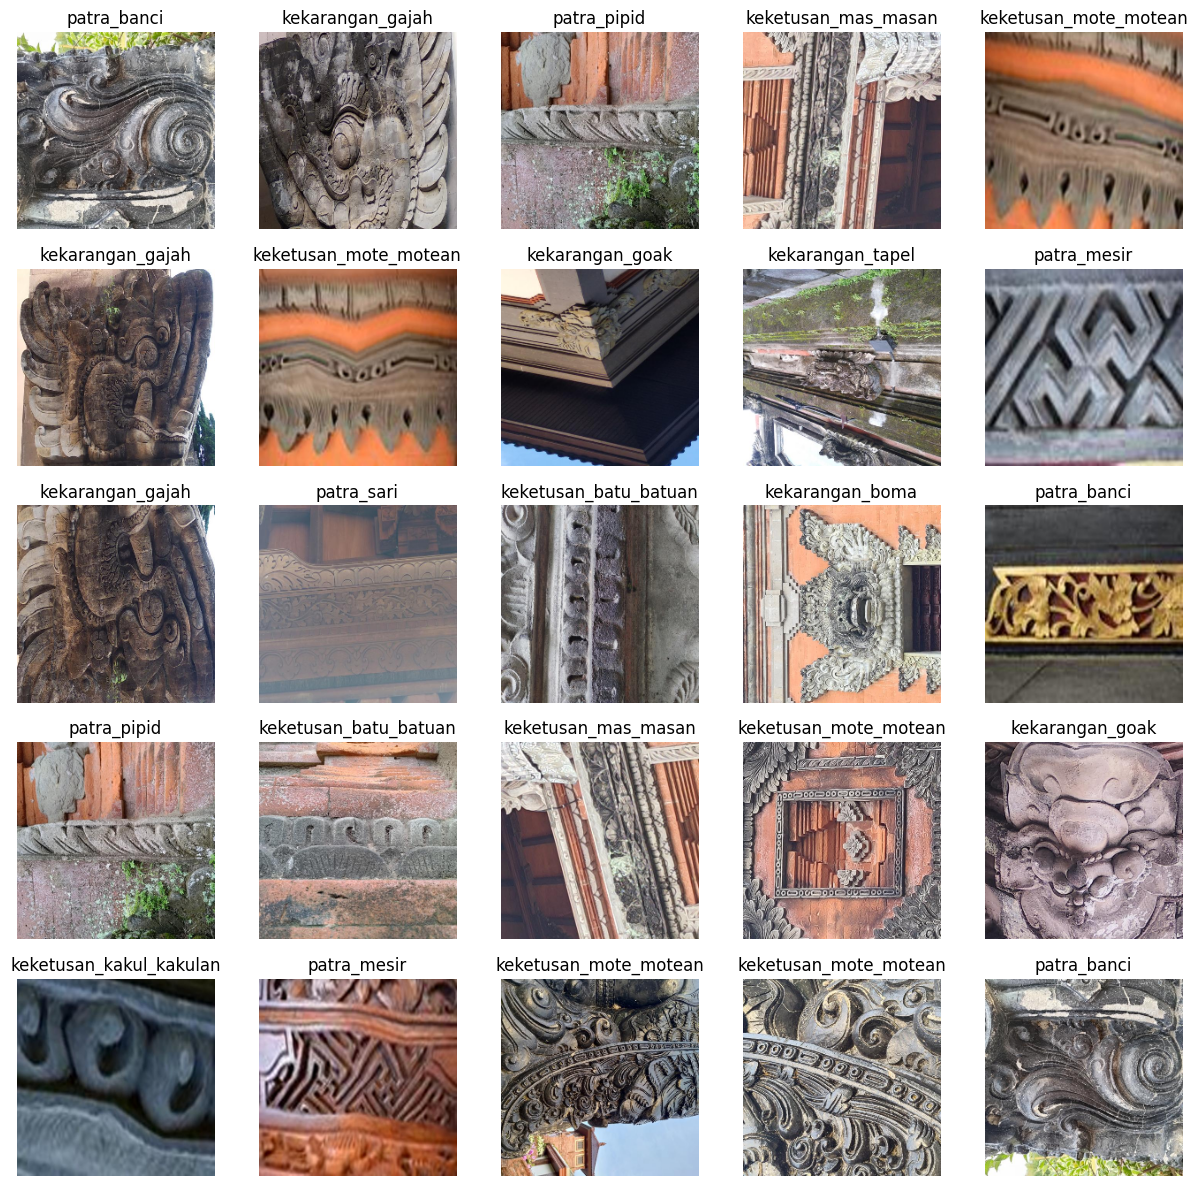

In [11]:
# PLOT/TAMPILKAN DATASET
import matplotlib.pyplot as plt
%matplotlib inline

nrows = 5     # ⚠️ SESUAIKAN ⚠️
ncols = 5     # ⚠️ SESUAIKAN ⚠️
hspace = 0
wspace = 0
fig, ax = plt.subplots(nrows, ncols, figsize=(13, 13))
fig.subplots_adjust(hspace, wspace)

for i in range(nrows):
    for j in range(ncols):
        temp = i*ncols+j
        ax[i,j].imshow(X_train[temp])
        if y_train[temp] == 0:
            judul = "kekarangan_boma"
        elif y_train[temp] == 1:
            judul = "kekarangan_bunga"
        elif y_train[temp] == 2:
            judul = "kekarangan_gajah"
        elif y_train[temp] == 3:
            judul = "kekarangan_goak"
        elif y_train[temp] == 4:
            judul = "kekarangan_tapel"
        elif y_train[temp] == 5:
            judul = "keketusan_batu_batuan"
        elif y_train[temp] == 6:
            judul = "keketusan_kakul_kakulan"
        elif y_train[temp] == 7:
            judul = "keketusan_mas_masan"
        elif y_train[temp] == 8:
            judul = "keketusan_mote_motean"
        elif y_train[temp] == 9:
            judul = "patra_banci"
        elif y_train[temp] == 10:
            judul = "patra_mesir"
        elif y_train[temp] == 11:
            judul = "patra_pipid"
        elif y_train[temp] == 12:
            judul = "patra_sari"
        ax[i,j].set_title(judul)        # Show labels
        ax[i,j].axis('off')             # Hide axis
plt.show()

In [12]:
# Data final yang akan digunakan
print("X_train_norm     :", X_train_norm.shape)
print("y_train_encode   :", y_train_encode.shape)

X_train_norm     : (1300, 224, 224, 3)
y_train_encode   : (1300, 13)


In [13]:
os.mkdir("/content/save_model")

In [14]:
print("Ukuran X_train:", X_train.shape)
print("Ukuran y_train:", y_train.shape)

Ukuran X_train: (1300, 224, 224, 3)
Ukuran y_train: (1300,)


In [15]:
import gc     # Gabage collector for cleaning deleted data from memory (in case : Clear list that are useless)

del dataTrain
del X_train
#del y_train  # Dipakai nanti untuk confusion Matrix

gc.collect()

60

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras import regularizers
import pandas as pd
import gc
import tensorflow as tf
import numpy as np

def define_model_mobilenetv2():
    base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    base_model.trainable = False
    base_model.summary()
    plot_model(base_model, to_file='(TEST 14) model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=80)
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    #model.add(Dropout(0.2, seed=10)) # Tambahkan dropout di sini
    model.add(Dense(13, activation='softmax', kernel_regularizer=regularizers.l2(0.001))) # Tambahkan regularisasi L2 di sini
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy']) # Sesuaikan Learning Rate di sini
    return model

def evaluate_model(dataX, dataY, n_folds=5):
    epochs = 10 # Sesuaikan jumlah epoch disini
    batch_size = 64 # Sesuaikan jumlah batch disini

    scores, histories = list(), list()
    kfold = KFold(n_splits=n_folds, shuffle=True, random_state=1)

    model = define_model_mobilenetv2()

    i = 0
    for train_ix, val_ix in kfold.split(dataX):
        i += 1
        trainX, trainY, valX, valY = X_train[train_ix], y_train[train_ix], X_train[val_ix], y_train[val_ix]

        # Mengompilasi dan melatih model pada GPU
        #with tf.device('/GPU:0'):
        history = model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, validation_data=(valX, valY), verbose=1)

        _, acc = model.evaluate(valX, valY, verbose=0)
        print('\nAkurasi Fold ke-' + str(i) + ' = %.3f' % (acc * 100.0))

        scores.append(acc)
        histories.append(history)

        model.save("/content/save_model/model_fold_" + str(i) + ".h5")
        model_csv = pd.DataFrame(history.history)
        model_csv.to_csv("/content/save_model/model_fold_" + str(i) + ".csv", index=False)

        del trainX
        del trainY
        del valX
        del valY
        gc.collect()

    return scores, histories

# Melakukan split data menjadi train dan validation dengan rasio 80% untuk data train dan 20% untuk data validation
X_train, X_val, y_train, y_val = train_test_split(X_train_norm, y_train_encode, test_size=0.2, random_state=42)

# Evaluasi model menggunakan data yang telah displit
scores, histories = evaluate_model(X_train, y_train)

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_3[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

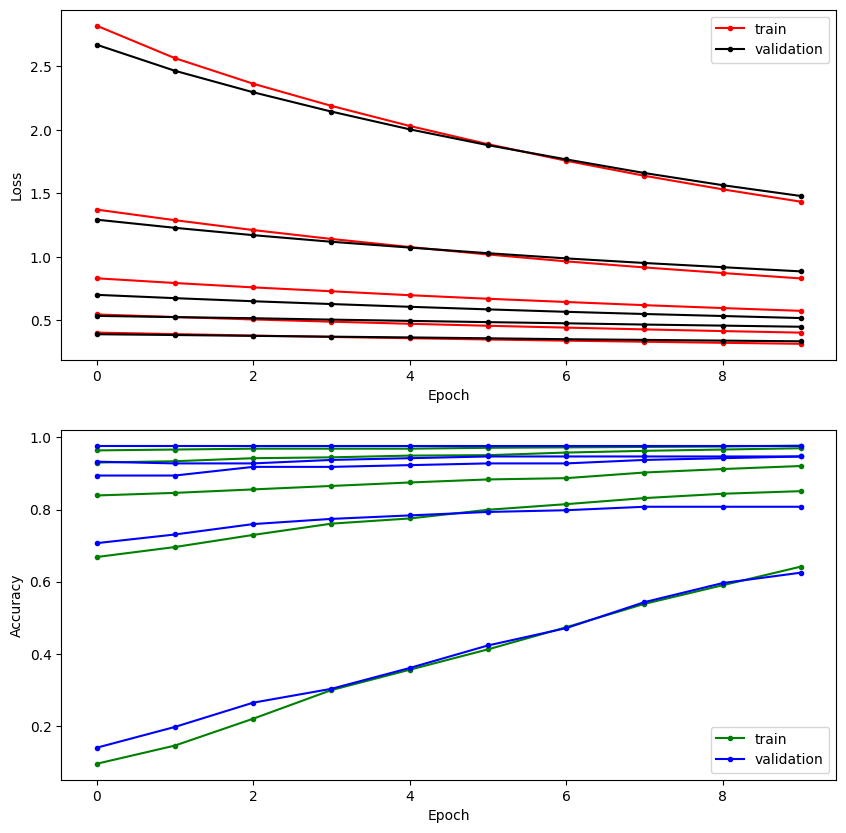

In [34]:
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

def summarize_diagnostics_combine(histories, save_path):
    plt.figure(figsize=(10,10))

    for i in range(len(histories)):
        # plot loss
        plt.subplot(211) # 2 baris, 1 kolom, index ke-1
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.plot(histories[i].history['loss'], color='red', marker='.', label='train')
        plt.plot(histories[i].history['val_loss'], color='black', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='upper right')

        # plot accuracy
        plt.subplot(212) # 2 baris, 1 kolom, index ke-2
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.plot(histories[i].history['accuracy'], color='green', marker='.', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='blue', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='lower right')

    plt.savefig(save_path)  # Menyimpan plot dalam bentuk gambar PNG
    plt.show()

#histories = [...]  # Daftar objek history yang ingin Anda plot

save_path = '(TEST 14) plot 211.png'  # Nama dan path file untuk menyimpan plot
summarize_diagnostics_combine(histories, save_path)

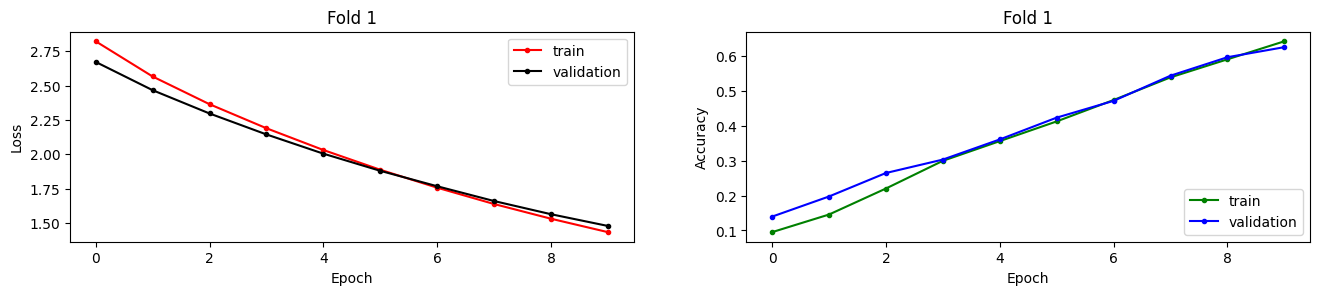

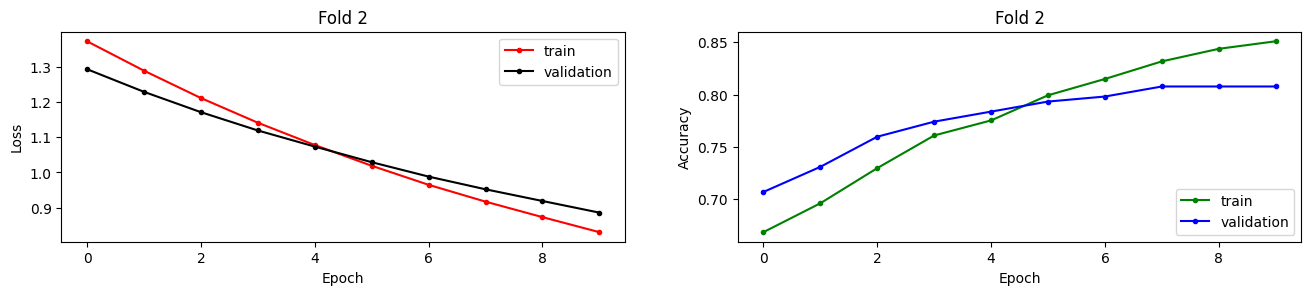

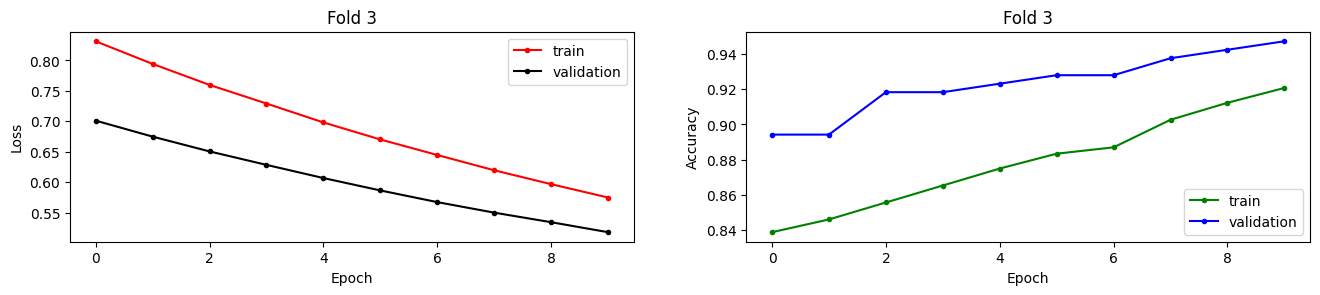

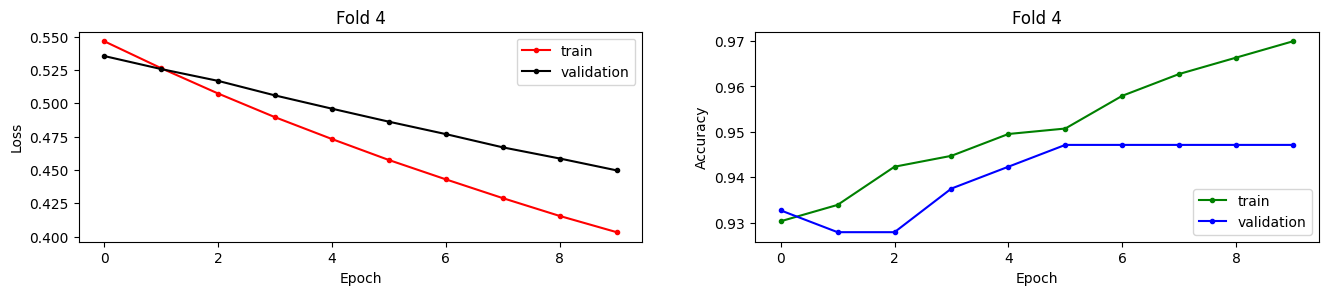

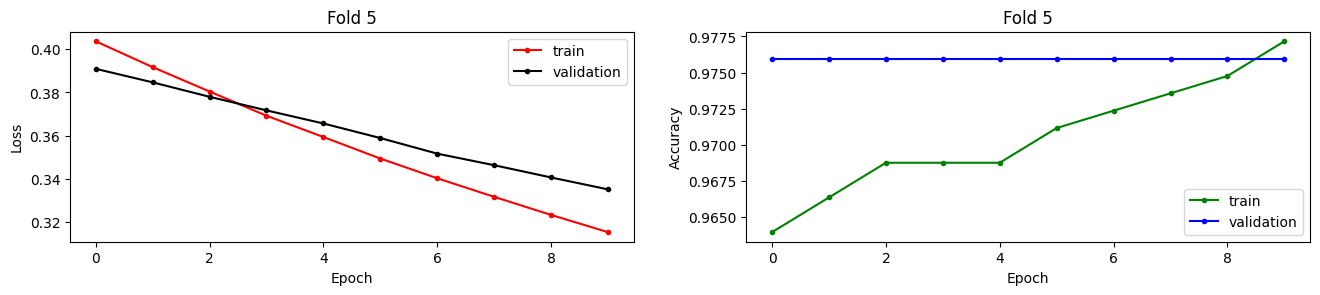

In [35]:
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

def summarize_diagnostics_single(histories, save_path_template):
    for i in range(len(histories)):
        plt.figure(figsize=(16,6))

        # plot loss
        plt.subplot(221) # 2 baris, 2 kolom, index ke-1
        plt.title('Fold ' + str(i+1))
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.plot(histories[i].history['loss'], color='red', marker='.', label='train')
        plt.plot(histories[i].history['val_loss'], color='black', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='upper right')

        # plot accuracy
        plt.subplot(222) # 2 baris, 2 kolom, index ke-2
        plt.title('Fold ' + str(i+1))
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.plot(histories[i].history['accuracy'], color='green', marker='.', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='blue', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='lower right')

        save_path = save_path_template.format(i+1)  # Format save_path sesuai dengan nomor fold
        plt.savefig(save_path)  # Menyimpan plot dalam bentuk gambar PNG
        plt.show()

#histories = [...]  # Daftar objek history yang ingin Anda plot

save_path_template = '(TEST 14) plot 221 fold {}.png'  # Template nama dan path file untuk menyimpan plot
summarize_diagnostics_single(histories, save_path_template)

Accuracy: mean=86.058 std=13.159, n=5


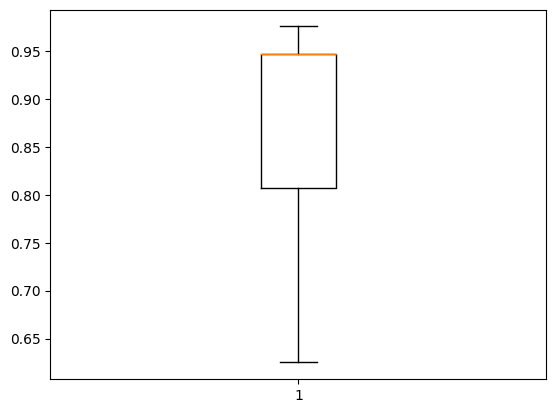

In [36]:
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt

def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    plt.boxplot(scores)
    plt.savefig(save_path)  # Menyimpan plot dalam bentuk gambar PNG
    plt.show()

# summarize estimated performance
save_path = '(TEST 14) peformance.png'  # Nama dan path file untuk menyimpan plot
summarize_performance(scores)

In [37]:
# Bersihkan model sebelumnya (RAM cleaner)
if "model" in globals():
  del model
  gc.collect()

# Load model
from keras.models import load_model
# Masukkan path model yang dipilih
model = load_model('/content/save_model/model_fold_5.h5') # ⚠️ SESUAIKAN ⚠️
#model.summary()

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

def generate_confusion_matrix(model, dataX, dataY):
    y_pred = model.predict(dataX)
    y_pred = np.argmax(y_pred, axis=1)
    y_true = np.argmax(dataY, axis=1)
    cm = confusion_matrix(y_true, y_pred)
    return cm

def plot_confusion_matrix(cmatrix, target_names, save_path):
    plt.figure(figsize=(8, 8))
    sns.heatmap(cmatrix, cmap="rocket_r", annot=True, fmt='.4g', linewidths=2, linecolor='white', cbar=False)
    plt.title('TEST 14 - 1300 Dataset - 100/Class\nMobileNetV2 Original\nLearning Rate 0.0001 | WITHOUT Dropout | L2 0.001 - Fold 5', fontsize=10, pad=24)
    plt.xlabel("(y) Label Prediksi", fontsize=16, color="blue", labelpad=24)
    plt.ylabel("(y) Label Sebenarnya", fontsize=16, color="blue", labelpad=24)
    plt.xticks(ticks=range(len(target_names)), labels=target_names, fontsize=10, rotation=50)
    plt.yticks(ticks=range(len(target_names)), labels=target_names, fontsize=10, rotation=0)
    plt.tick_params(axis='x', pad=8)
    plt.ylim(len(target_names), 0)
    plt.savefig(save_path)  # Menyimpan confusion matrix dalam bentuk gambar
    plt.close()

def print_classification_report(true_label, pred_label, target_names, save_path):
    creport = classification_report(true_label, pred_label, target_names=target_names, output_dict=True)
    df = pd.DataFrame(creport).transpose()
    df.drop(['accuracy', 'macro avg', 'weighted avg'], inplace=True)
    df = df.round(decimals=2)

    plt.figure(figsize=(10, 6))
    plt.axis('off')
    table = plt.table(cellText=df.values,
                      colLabels=df.columns,
                      rowLabels=df.index,
                      cellLoc='center',
                      loc='center',
                      bbox=[0, 0, 1, 1])
    table.auto_set_font_size(False)
    table.set_fontsize(14)
    table.scale(1.4, 1.4)
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0.5)  # Menyimpan classification report dalam bentuk gambar
    plt.close()

# Menghasilkan confusion matrix
cmatrix = generate_confusion_matrix(model, X_val, y_val)

# Menentukan daftar nama kelas target
target_names = ['boma', 'bunga', 'gajah', 'goak', 'tapel', 'batuan', 'kakulan', 'masan', 'motean', 'banci', 'mesir', 'pipid', 'sari']

# Menampilkan confusion matrix dalam bentuk tabel
plot_confusion_matrix(cmatrix, target_names, '(TEST 14) confusion_matrix.png')

# Konversi confusion matrix menjadi DataFrame dengan nama kelas sebagai indeks dan kolom
#cm_df = pd.DataFrame(cmatrix, index=target_names, columns=target_names)
#cm_df.to_csv('(TEST 3) confusion_matrix - LR 001 - DO 05 + SEED 10 - L2 0001.csv')  # Simpan confusion matrix dalam file CSV

# Memprediksi label
y_pred = model.predict(X_val)
y_pred = np.argmax(y_pred, axis=1)

# Menampilkan classification report dan menyimpannya sebagai file gambar
classification_report_path = '(TEST 14) classification_report.png'
print_classification_report(np.argmax(y_val, axis=1), y_pred, target_names, classification_report_path)

9/9 [==============================] - 9s 972ms/step


In [39]:
import pandas as pd

# 01 - Save model as h5
model.save('(TEST 14) MODEL-14-04-2024.h5')

# 02 - Save model report to csv
#model_csv = pd.DataFrame(history.history)
#csv_file = "final_model.csv"
#with open(csv_file, mode="w") as f:
#    model_csv.to_csv(f)

In [23]:
# BIKIN PREDIKSI #
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np

# load and prepare the image
def load_image(filename):
    img_size_224p = 224
    img = load_img(filename, target_size=(img_size_224p, img_size_224p))
    plt.imshow(img)
    plt.axis("off")
    img = img_to_array(img)
    img = img.reshape(-1, img_size_224p, img_size_224p, 3)
    img = img.astype('float32')
    img = img / 255.0
    return img

def run_example(new_data_path):
    # load the image
    img = load_image(new_data_path)
    # load model
    model = load_model('/content/(TEST 14) MODEL-14-04-2024.h5')  # ganti dengan path model yang benar
    # predict the class
    result = model.predict(img)
    predicted_class = np.argmax(result, axis=-1)

    if predicted_class == 0:
        print("Hasil Prediksi: Karang Boma")
    elif predicted_class == 1:
        print("Hasil Prediksi: Karang Bunga")
    elif predicted_class == 2:
        print("Hasil Prediksi: Karang Gajah")
    elif predicted_class == 3:
        print("Hasil Prediksi: Karang Goak")
    elif predicted_class == 4:
        print("Hasil Prediksi: Karang Tapel")
    elif predicted_class == 5:
        print("Hasil Prediksi: Batu Batuan")
    elif predicted_class == 6:
        print("Hasil Prediksi: Kakul Kakulan")
    elif predicted_class == 7:
        print("Hasil Prediksi: Mas Masan")
    elif predicted_class == 8:
        print("Hasil Prediksi: Mote Motean")
    elif predicted_class == 9:
        print("Hasil Prediksi: Patra Banci")
    elif predicted_class == 10:
        print("Hasil Prediksi: Patra Mesir")
    elif predicted_class == 11:
        print("Hasil Prediksi: Patra Pipid")
    elif predicted_class == 12:
        print("Hasil Prediksi: Patra Sari")

In [24]:
# Upload data baru via local PC
#from google.colab import files
#uploaded = files.upload()

In [ ]:
# Untuk test prediksi
#new_data_path = 'your_path'
#run_example(new_data_path)